# WholeSlideAnnotation

In [2]:
from wholeslidedata import WholeSlideAnnotation
from wholeslidedata.visualization.plotting import plot_annotations
from colour import Color
from matplotlib import pyplot as plt

In [3]:
wsa = WholeSlideAnnotation('/tmp/TCGA-21-5784-01Z-00-DX1.xml')

In [3]:
print(len(wsa.annotations))
print(wsa.labels.names)
color_map = {label_name: Color(pick_for=label_name).hex_l for label_name in wsa.labels.names}

10
['lymphocytes', 'stroma', 'tumor']


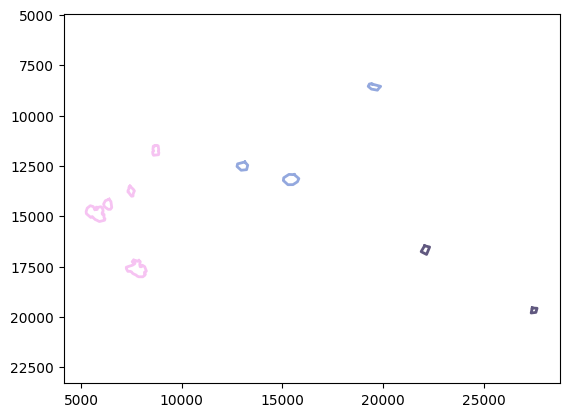

In [8]:
plot_annotations(wsa.annotations, color_map=color_map)

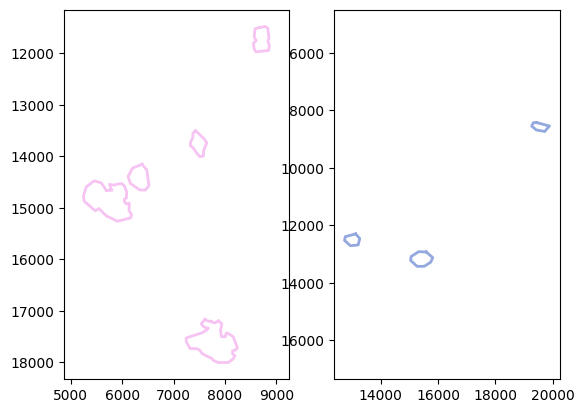

In [7]:
selected_annotations = wsa.select_annotations(center_x=7500, center_y=15000, width=5000, height=10000)
lymphocyte_annotations = [annotation for annotation in wsa.annotations if annotation.label.name == "lymphocytes"]
fig, axes = plt.subplots(1,2)
plot_annotations(selected_annotations, ax=axes[0], color_map=color_map)
plot_annotations(lymphocyte_annotations, ax=axes[1], color_map=color_map)
plt.show()

# Label names

['other', 'tumor']


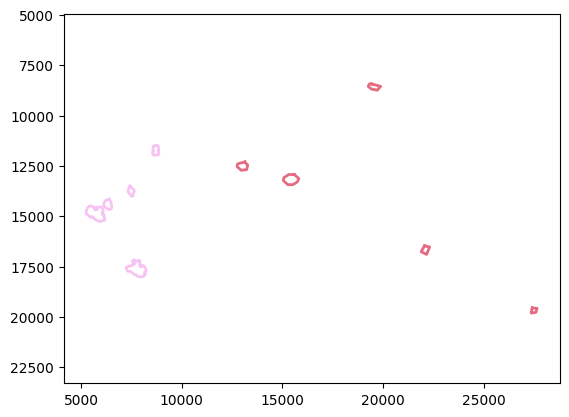

In [14]:
wsa = WholeSlideAnnotation('/tmp/TCGA-21-5784-01Z-00-DX1.xml', labels={'tumor':1, 'stroma': 2, 'lymphocytes':2}, renamed_labels={'tumor':1, 'other':2})
print(wsa.labels.names)
color_map = {label_name: Color(pick_for=label_name).hex_l for label_name in wsa.labels.names}
plot_annotations(wsa.annotations, color_map=color_map)

# Callbacks

In [15]:
from wholeslidedata.annotation.hooks import ScalingAnnotationHook, TiledAnnotationHook

In [16]:
wsa = WholeSlideAnnotation('/tmp/TCGA-21-5784-01Z-00-DX1.xml', hooks=(ScalingAnnotationHook(0.5),))

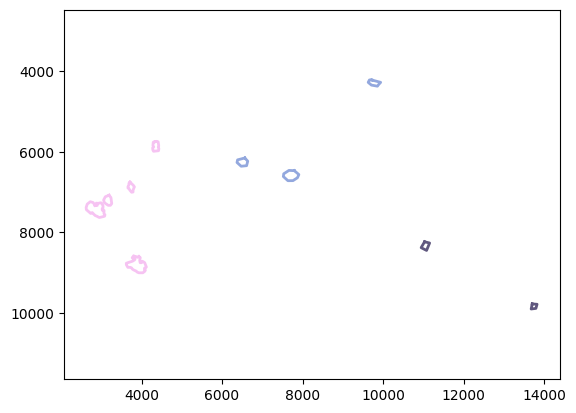

In [17]:
color_map = {label_name: Color(pick_for=label_name).hex_l for label_name in wsa.labels.names}
plot_annotations(wsa.annotations, color_map=color_map)

In [28]:
labels={'tumor':1, 'stroma': 2, 'lymphocytes':2}
wsa = WholeSlideAnnotation('/tmp/TCGA-21-5784-01Z-00-DX1.xml', labels=labels, hooks=(TiledAnnotationHook(tile_size=256, label_names=list(labels)),))

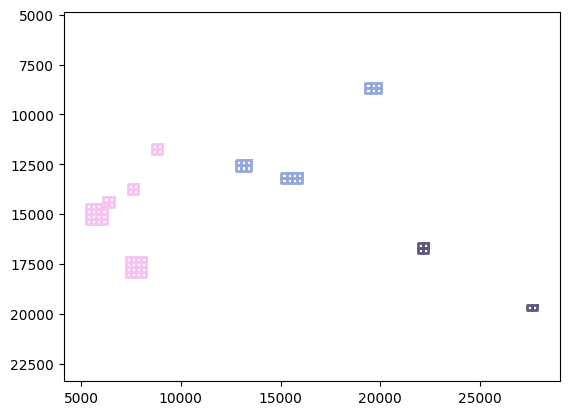

In [29]:
color_map = {label_name: Color(pick_for=label_name).hex_l for label_name in wsa.labels.names}
plot_annotations(wsa.annotations, color_map=color_map)

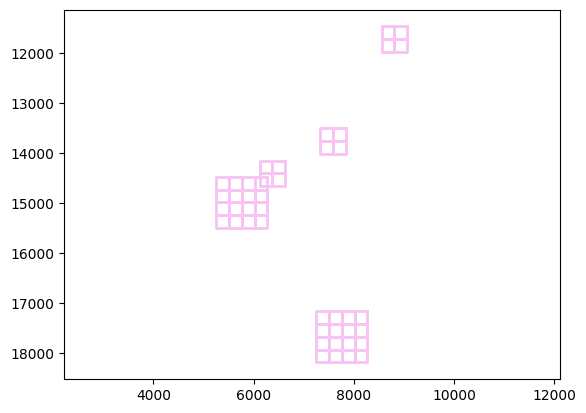

In [30]:
selected_annotations = wsa.select_annotations(center_x=7500, center_y=15000, width=5000, height=10000)
plot_annotations(selected_annotations, color_map=color_map)